<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/cum_df_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import copy

In [ ]:
df = pd.read_csv('result_div_ctg_sls.csv')
df.columns = [col.lower() for col in df.columns]
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df['week_end_date'] = pd.to_datetime(df['week_end_date'])
df['r52w_div_ctg_total_item_qty_scaled_down_in_millions'] = np.ceil(df['r52w_div_ctg_total_item_qty'] / 1000000)
df

,week_start_date,week_end_date,division_id,smic_group_cd,smic_category_cd,r52w_div_ctg_total_item_qty,r52w_div_ctg_total_item_qty_scaled_down_in_millions
0,2022-01-30,2022-02-05,29,49,1,14509929,15.0
1,2022-01-30,2022-02-05,29,49,2,10431855,11.0
2,2022-01-30,2022-02-05,29,49,5,27606110,28.0
3,2022-01-30,2022-02-05,20,36,5,314726608,315.0
4,2022-01-30,2022-02-05,20,36,10,427127463,428.0
...,...,...,...,...,...,...,...
778,2023-01-22,2023-01-28,29,49,25,891114,1.0
779,2023-01-22,2023-01-28,20,36,25,60436551,61.0
780,2023-01-22,2023-01-28,20,36,30,608817552,609.0
781,2023-01-22,2023-01-28,20,36,35,11876718,12.0


In [ ]:
df['week_end_date'].max()

Timestamp('2023-01-28 00:00:00')

In [51]:
df_latest_week = copy.deepcopy(df[df.week_end_date == df['week_end_date'].max()])
df_latest_week.sort_values(by = ['division_id','r52w_div_ctg_total_item_qty'], inplace=True)
df_latest_week

,week_start_date,week_end_date,division_id,smic_group_cd,smic_category_cd,r52w_div_ctg_total_item_qty,r52w_div_ctg_total_item_qty_scaled_down_in_millions
781,2023-01-22,2023-01-28,20,36,35,11876718,12.0
782,2023-01-22,2023-01-28,20,36,40,40998251,41.0
779,2023-01-22,2023-01-28,20,36,25,60436551,61.0
776,2023-01-22,2023-01-28,20,36,20,93534483,94.0
774,2023-01-22,2023-01-28,20,36,15,301039487,302.0
770,2023-01-22,2023-01-28,20,36,5,314726608,315.0
773,2023-01-22,2023-01-28,20,36,10,427127463,428.0
780,2023-01-22,2023-01-28,20,36,30,608817552,609.0
778,2023-01-22,2023-01-28,29,49,25,891114,1.0
769,2023-01-22,2023-01-28,29,49,2,10431855,11.0


In [52]:
df_latest_week[['division_id', 'smic_group_cd', 'smic_category_cd']].sort_values(by=['division_id','smic_group_cd','smic_category_cd']).drop_duplicates()

,division_id,smic_group_cd,smic_category_cd
770,20,36,5
773,20,36,10
774,20,36,15
776,20,36,20
779,20,36,25
780,20,36,30
781,20,36,35
782,20,36,40
768,29,49,1
769,29,49,2


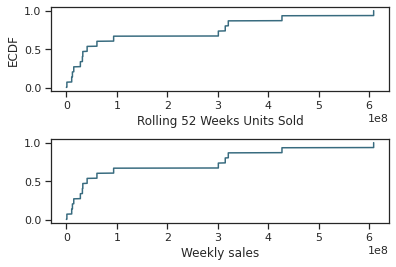

In [53]:
sns.set(style = "ticks")
c = '#386B7F' 
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=2.0)
plt.subplot(211)
cdf = ECDF(df['r52w_div_ctg_total_item_qty'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Rolling 52 Weeks Units Sold'); plt.ylabel('ECDF');

plt.subplot(212)
cdf = ECDF(df['r52w_div_ctg_total_item_qty'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Weekly sales');

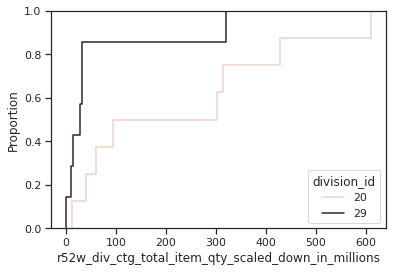

In [54]:
sns.ecdfplot(data = df_latest_week, x = "r52w_div_ctg_total_item_qty_scaled_down_in_millions", hue = "division_id")
#sns.kdeplot(data = df_latest_week, x = "r52w_div_ctg_total_item_qty_scaled_down_in_millions")

In [57]:
df_latest_week.groupby(['division_id'])['r52w_div_ctg_total_item_qty_scaled_down_in_millions'].describe().T

division_id,20,29
count,8.000000,7.000000
mean,232.750000,63.000000
std,215.637096,114.383857
min,12.000000,1.000000
25%,56.000000,13.000000
50%,198.000000,28.000000
75%,343.250000,32.500000
max,609.000000,321.000000


In [ ]:
np.quantile(df_latest_week['r52w_div_ctg_total_item_qty_scaled_down_in_millions'], .75)

32.5

In [ ]:
np.round(np.quantile(df_latest_week['r52w_div_ctg_total_item_qty_scaled_down_in_millions'], .80))

33.0

In [ ]:
np.where(df_latest_week['r52w_div_ctg_total_item_qty_scaled_down_in_millions'] > np.round(np.quantile(df_latest_week['r52w_div_ctg_total_item_qty_scaled_down_in_millions'], .80)) , 1, 0)

array([0, 0, 0, 0, 0, 0, 1])

In [58]:
df_latest_week[df_latest_week.division_id == 20]

,week_start_date,week_end_date,division_id,smic_group_cd,smic_category_cd,r52w_div_ctg_total_item_qty,r52w_div_ctg_total_item_qty_scaled_down_in_millions
781,2023-01-22,2023-01-28,20,36,35,11876718,12.0
782,2023-01-22,2023-01-28,20,36,40,40998251,41.0
779,2023-01-22,2023-01-28,20,36,25,60436551,61.0
776,2023-01-22,2023-01-28,20,36,20,93534483,94.0
774,2023-01-22,2023-01-28,20,36,15,301039487,302.0
770,2023-01-22,2023-01-28,20,36,5,314726608,315.0
773,2023-01-22,2023-01-28,20,36,10,427127463,428.0
780,2023-01-22,2023-01-28,20,36,30,608817552,609.0


In [60]:
df_latest_week.groupby(['division_id', 'smic_group_cd'])['r52w_div_ctg_total_item_qty_scaled_down_in_millions'].cumsum()

781      12.0
782      53.0
779     114.0
776     208.0
774     510.0
770     825.0
773    1253.0
780    1862.0
778       1.0
769      12.0
768      27.0
771      55.0
772      87.0
775     120.0
777     441.0
Name: r52w_div_ctg_total_item_qty_scaled_down_in_millions, dtype: float64